# Phase transition in a 2D system of hard disks

In [1]:
import random, math, pylab, os, random

def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(x[1] - y[1]) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2)

def show_conf(L, sigma, title, fname):
    '''
    drawing disks with periodic boundary conditions
    '''
    pylab.axes()
    for [x, y] in L:
        for ix in range(-1, 2):
            for iy in range(-1, 2):
                cir = pylab.Circle((x + ix, y + iy), radius=sigma,  fc='r')
                pylab.gca().add_patch(cir)
    pylab.axis('scaled')
    pylab.title(title)
    pylab.axis([0.0, 1.0, 0.0, 1.0])
    pylab.savefig(fname)
    pylab.show()
    pylab.close()

Markov chain Monte Carlo for hard disks

In [2]:
eta = 0.72 # fraction of space occupied by disks

N = 64 # number of disks, must be a power of 2
N_sqrt = int(math.sqrt(N))
sigma = math.sqrt(eta / N / math.pi) # radius of a disk

# initial config for N disks
filename = 'disk_configuration_N%i_eta%.2f.txt' % (N, eta)
if os.path.isfile(filename):
    f = open(filename, 'r')
    L = []
    for line in f:
        a, b = line.split()
        L.append([float(a), float(b)])
    f.close()
    print ('starting from file', filename)
else:
    # generate initial config
    delxy = sigma
    two_delxy = 2*delxy
    L = [[0.0 + delxy + i * two_delxy, delxy + j * two_delxy] for i in range(N_sqrt) for j in range(N_sqrt)]
    print ('starting from a new valid configuration')

delta = 0.3*sigma
n_steps = 70000
for steps in range(n_steps):
    
    a = random.choice(L) # choose one of the disks
    # move it to new position b
    b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]
    
    # smallest distance between moved disk and any other disk
    min_dist = min([dist(b, c) for c in L if c != a])
    
    # test if no collision => test only pair collision
    # no need to test wall collision because of periodic boundary conditions
    if not (min_dist < 2.0 * sigma):
        # fold coordinates of b in the interval [0.0; 1.0]
        b_periodic = [x%1.0 for x in b]
        # assign b_periodic to a[:], using a[:] instead of just a broadcasts change to L, from which a originates
        a[:] = b_periodic

# save new positions in file
f = open(filename, 'w')
for a in L:
    f.write(str(a[0]) + ' ' + str(a[1]) + '\n')
f.close()

starting from file disk_configuration_N64_eta0.72.txt


Initial state

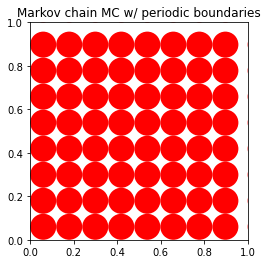

In [3]:
show_conf(L, sigma, 'Markov chain MC w/ periodic boundaries', 'N_disks.png')

1000 steps

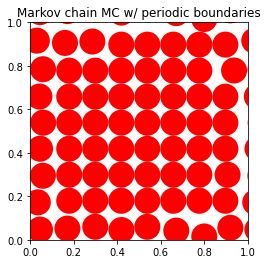

In [5]:
show_conf(L, sigma, 'Markov chain MC w/ periodic boundaries', 'N_disks.png')

5000 steps

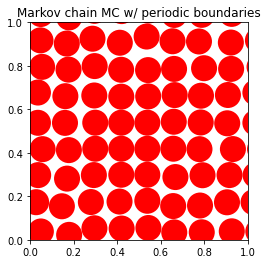

In [7]:
show_conf(L, sigma, 'Markov chain MC w/ periodic boundaries', 'N_disks.png')

10000 steps

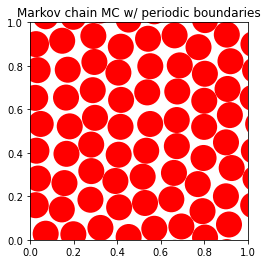

In [10]:
show_conf(L, sigma, 'Markov chain MC w/ periodic boundaries', 'N_disks.png')

**Local hexagonal order appears for large number of steps:**

hexagonal order = close-packed order for 2D solids (Toth 1940)

30000 steps

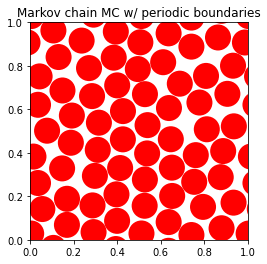

In [12]:
show_conf(L, sigma, 'Markov chain MC w/ periodic boundaries', 'N_disks.png')

70000 steps

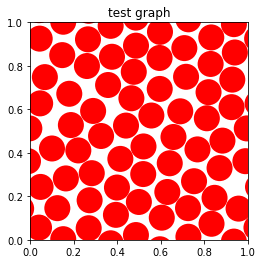

In [3]:
# n_steps = 70000
show_conf(L, sigma, 'test graph', 'intermediate70000.png')

#### incorporation of local order parameter

$\psi_6(i) = \frac{1}{\# neighbors}\sum_j{exp(6i_{imag}\phi_{ij}})$

In [4]:
import cmath
import random, math, pylab, os, random
import numpy as np
from tqdm import tqdm_notebook as tqdm

def delx_dely(x, y):
    d_x = (x[0] - y[0]) % 1.0
    if d_x > 0.5: d_x -= 1.0
    d_y = (x[1] - y[1]) % 1.0
    if d_y > 0.5: d_y -= 1.0
    return d_x, d_y

def Psi_6(L, sigma):
    '''
    global order parameter
    '''
    sum_vector = 0j
    for i in range(N):
        vector  = 0j
        n_neighbor = 0
        for j in range(N):
            if dist(L[i], L[j]) < 2.8 * sigma and i != j:
                n_neighbor += 1
                dx, dy = delx_dely(L[j], L[i])
                angle = cmath.phase(complex(dx, dy))
                vector += cmath.exp(6.0j * angle)
        if n_neighbor > 0:
            vector /= n_neighbor
        sum_vector += vector
    return sum_vector / float(N)

Order parameter as function of density $\eta$

In [7]:
eta = 0.72 # fraction of space occupied by disks

N = 64 # number of disks, must be a power of 2
N_sqrt = int(math.sqrt(N))

# initial config for N disks
filename = 'disk_configuration_N%i_eta%.2f.txt' % (N, eta)
if os.path.isfile(filename):
    f = open(filename, 'r')
    L = []
    for line in f:
        a, b = line.split()
        L.append([float(a), float(b)])
    f.close()
    print ('starting from file', filename)

Psi_eta = []
eta_list = [x/100 for x in range(72, 1, -2)]
for eta in tqdm(eta_list):
    sigma = math.sqrt(eta / N / math.pi) # radius of a disk

    # Sampling using Markov chain
    delta = 0.3*sigma
    n_steps = 50000
    Psi_6_list = []
    for steps in range(n_steps):

        a = random.choice(L) # choose one of the disks
        # move it to new position b
        b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]

        # smallest distance between moved disk and any other disk
        min_dist = min([dist(b, c) for c in L if c != a])

        # test if no collision => test only pair collision
        if not (min_dist < 2.0 * sigma):
            # fold coordinates of b in the interval [0.0; 1.0]
            b_periodic = [x%1.0 for x in b]
            # assign b_periodic to a[:], using a[:] instead of just a broadcasts change to L, from which a originates
            a[:] = b_periodic

        if steps%100 == 0:
            Psi_6_100 = Psi_6(L, sigma)
            Psi_6_list.append(abs(Psi_6_100)) # record module of Psi_6_100
            
    Psi_eta.append(np.mean(Psi_6_list))

starting from file disk_configuration_N64_eta0.72.txt


<ipython-input-7-d909770ce199>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for eta in tqdm(eta_list):


**Phase transition occurs around density $\eta$ = 0.6-0.7**

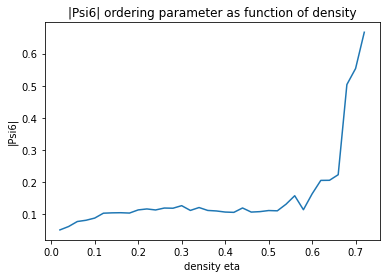

In [8]:
# Begin of graphics output
pylab.plot(eta_list, Psi_eta)
pylab.xlabel('density eta')
pylab.ylabel('|Psi6|')
pylab.title('|Psi6| ordering parameter as function of density')
pylab.savefig('Psi6_eta-50000.png')
pylab.show()